# <font color = cyan>**AEROFIT BUSINESS CASE**  </font>

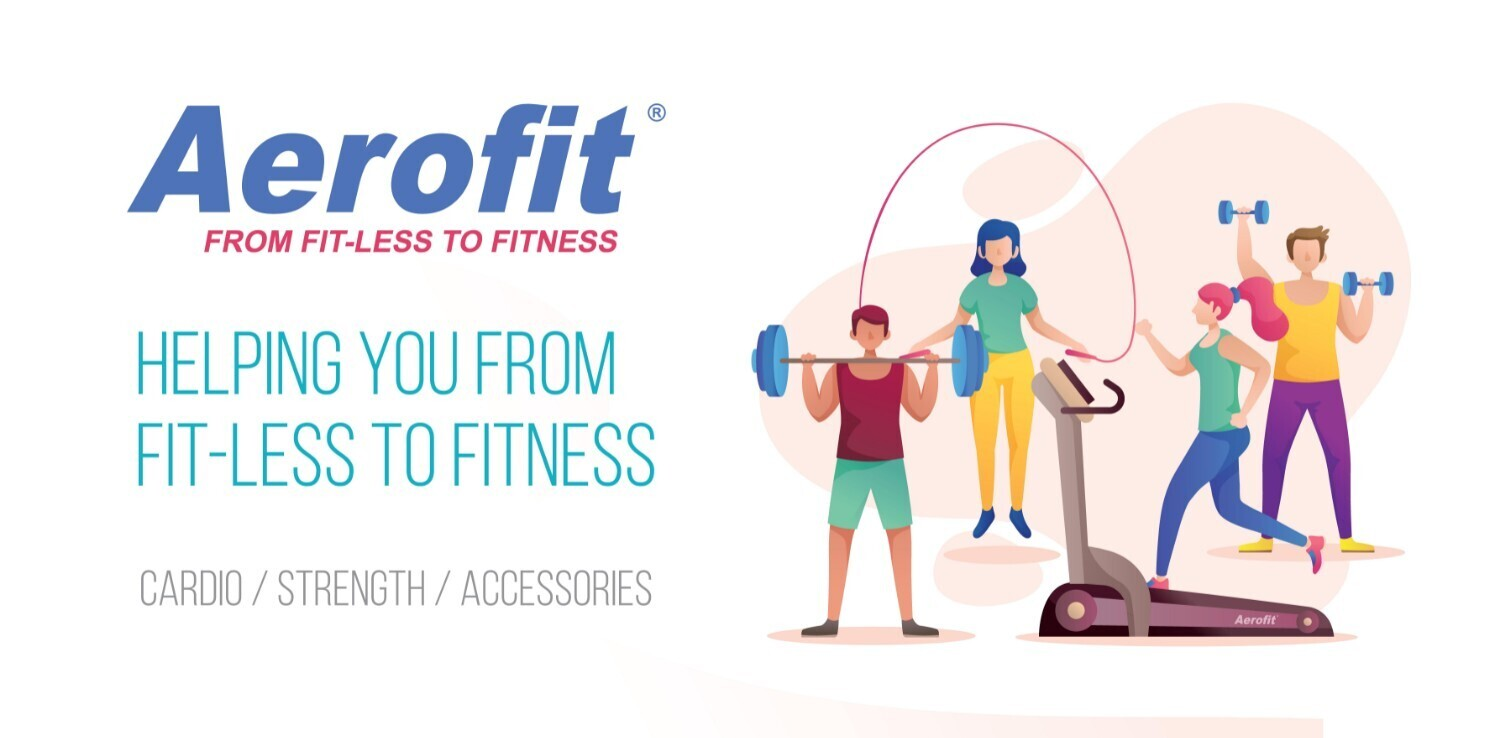

### <font color = cyan>Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.- </font>



# <font color = blue> **PROBLEM STATEMENT AND ANALYSING BASIC METRICS** - </font>

## <font color = green> **PROBLEM STATEMENT** - </font>

### <font color = green> The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.</font>
### <font color = green> 1) Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.</font>
### <font color = green> 2) For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.</font>ss.

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [4]:
df = pd.read_csv("aerofit_treadmill.txt")

In [4]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [5]:
df.shape # shape of data


(180, 9)

In [6]:
df.info() # information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.dtypes # data types of all the attributes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
df.describe() # statistical summary      

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
df.describe(include = object) # Description of data type-> object  columns

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [10]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
# Converting Int data type of fitness rating to object data type
df_cat = df
df_cat["Fitness_category"] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [7]:
df_cat["Fitness_category"].replace(
    {1:'Poor Shape',
     2:'Bad Shape',
     3:'Average Shape',
     4:'Good Shape',
     5:'Excellent Shape'},inplace = True)


In [8]:
df_cat["MaritalStatus"].replace({'Partnered':'Married'},inplace = True)

In [9]:
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Married,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Married,4,2,35247,47,Bad Shape


# <font color = blue> **MISSING VALUE DETECTION/NULL VALUE DETECTION**</font>

In [7]:
df_cat.isna().sum() 

Product             0
Age                 0
Gender              0
Education           0
MaritalStatus       0
Usage               0
Fitness             0
Income              0
Miles               0
Fitness_category    0
dtype: int64

### Insight - In the aerofit dataset no null/missing values were detected.

# <font color = blue> **NON-GRAPHICAL ANALYSIS**</font>

In [15]:
df_cat.nunique() # unique values of all the attributes

Product              3
Age                 32
Gender               2
Education            8
MaritalStatus        2
Usage                6
Fitness              5
Income              62
Miles               37
Fitness_category     5
dtype: int64

### Value counts of each attribute

In [16]:
df_cat["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [120]:
df_cat["Age"].value_counts().head()

Age
25    25
23    18
24    12
26    12
28     9
Name: count, dtype: int64

In [121]:
df_cat["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [122]:
df_cat["Education"].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [123]:
df_cat["MaritalStatus"].value_counts()

MaritalStatus
Married    107
Single      73
Name: count, dtype: int64

In [124]:
df_cat["Usage"].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [56]:
df_cat["Fitness"].value_counts().sort_index()

Fitness
1     2
2    26
3    97
4    24
5    31
Name: count, dtype: int64

In [126]:
df_cat['Income'].nunique()

62

In [127]:
df_cat["Income"].value_counts().head()

Income
45480    14
52302     9
46617     8
54576     8
53439     8
Name: count, dtype: int64

In [128]:
df_cat["Miles"].value_counts().head()

Miles
85    27
95    12
66    10
75    10
47     9
Name: count, dtype: int64

In [7]:
df_cat

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Married,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Married,4,2,35247,47,Bad Shape
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Excellent Shape
176,KP781,42,Male,18,Single,5,4,89641,200,Good Shape
177,KP781,45,Male,16,Single,5,5,90886,160,Excellent Shape
178,KP781,47,Male,18,Married,4,5,104581,120,Excellent Shape


In [132]:
# for unique list of products, listed in percentage


a = df_cat["Product"].value_counts(normalize = True) * 100
product = np.round(a,2)
product

Product
KP281    44.44
KP481    33.33
KP781    22.22
Name: proportion, dtype: float64

In [133]:
b = df_cat["MaritalStatus"].value_counts(normalize = True) * 100
MaritalStatus = np.round(b,2)
MaritalStatus

MaritalStatus
Married    59.44
Single     40.56
Name: proportion, dtype: float64

In [134]:
c = df_cat["Gender"].value_counts(normalize = True) * 100
Gender = np.round(c,2)
Gender

Gender
Male      57.78
Female    42.22
Name: proportion, dtype: float64

In [55]:
d = df_cat['Fitness_category'].value_counts(normalize = True) * 100
Fitness_category = np.round(d,2)
Fitness_category

Fitness_category
Average Shape      53.89
Excellent Shape    17.22
Bad Shape          14.44
Good Shape         13.33
Poor Shape          1.11
Name: proportion, dtype: float64

In [11]:
usage = df_cat['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage         

,Usage,proportion
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


In [60]:
f = df_cat['Miles'].value_counts(normalize = True) * 100
Miles = np.round(f,2)
Miles.head()

Miles
85    15.00
95     6.67
66     5.56
75     5.56
47     5.00
Name: proportion, dtype: float64

In [62]:
g = df_cat['Age'].value_counts(normalize = True) * 100
Age = np.round(g,2)
Age.head()

Age
25    13.89
23    10.00
24     6.67
26     6.67
28     5.00
Name: proportion, dtype: float64

In [64]:
h = df_cat['Education'].value_counts(normalize = True) * 100
Education = np.round(h,2)
Education.head()

Education
16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
Name: proportion, dtype: float64

In [66]:
i = df_cat['Income'].value_counts(normalize = True) * 100
Income = np.round(h,2)
Income.head()

Education
16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
Name: proportion, dtype: float64

In [12]:
df_cat.groupby("Age")["Product"].count().head()

Age
18    1
19    4
20    5
21    7
22    7
Name: Product, dtype: int64

### Converting columns - Age, Miles, Income, Education into groups

In [13]:
# Define age bins and labels
bins = [0, 18, 30, 40, 60, 100]  # Customize these bins according to your age groups
labels = ['0-18', '19-30', '31-40', '41-60', '61+']

# Create a new column 'AgeGroup' using cut
df_cat['AgeGroup'] = pd.cut(df_cat['Age'], bins=bins, labels=labels, right=False)

In [14]:
miles_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400]
miles_labels = ['0-50', '51-100', '101-150', '151-200', '201-250','251-300', '301-400','401+']
df_cat['MilesGroup'] = pd.cut(df_cat['Miles'], bins=miles_bins, labels=miles_labels, right=False)

In [15]:
income_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
income_labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', '50001-60000', '60001-70000', '70001-80000', '80001-90000', '90001-100000']
df_cat['IncomeGroup'] = pd.cut(df_cat['Income'], bins=income_bins, labels=income_labels, right=False)

In [16]:
edu_years_bins = [0, 12, 16, 18, 20, 25]
edu_years_labels = ['0-12', '13-16', '17-18', '19-20', '21+']
df_cat['EducationYearsGroup'] = pd.cut(df_cat['Education'], bins=edu_years_bins, labels=edu_years_labels, right=False)
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_category,AgeGroup,MilesGroup,IncomeGroup,EducationYearsGroup
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,19-30,101-150,20001-30000,13-16
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,19-30,51-100,30001-40000,13-16
2,KP281,19,Female,14,Married,4,3,30699,66,Average Shape,19-30,51-100,30001-40000,13-16
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,19-30,51-100,30001-40000,13-16
4,KP281,20,Male,13,Married,4,2,35247,47,Bad Shape,19-30,0-50,30001-40000,13-16


# <font color = blue> **VISUAL ANALYSIS**</font>

## Univariate

### Countplot

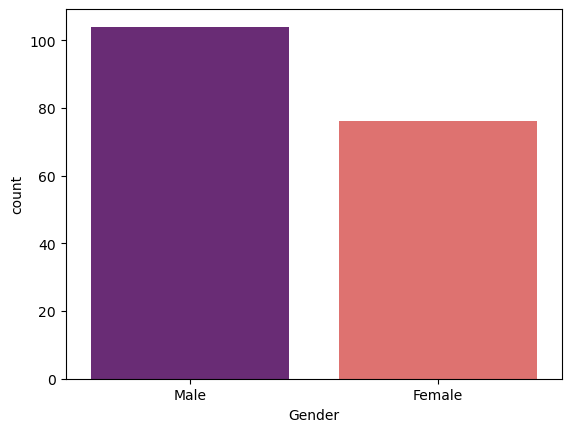

In [136]:
sns.countplot(df_cat,x = "Gender",palette = "magma")
plt.show()

### Insight - In our dataset, there is a higher proportion of males than females.

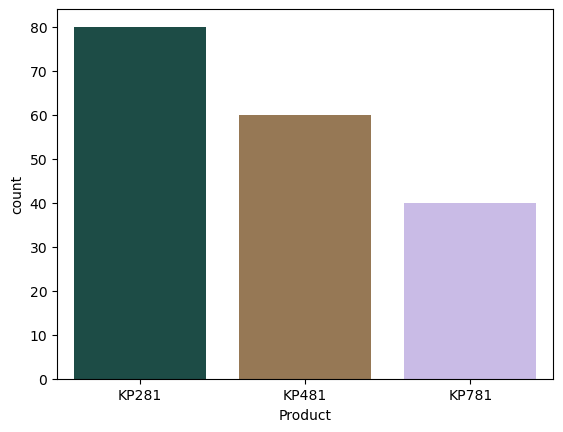

In [138]:
sns.countplot(df_cat,x = "Product",palette = "cubehelix")
plt.show()

### Insight - Based on the preceding observation, it is evident that product KP281 has recorded the highest sales.

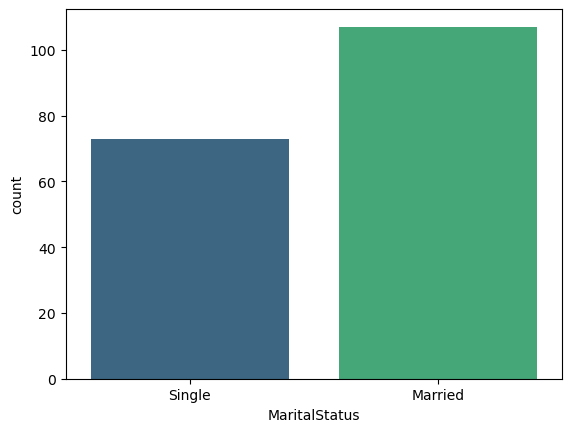

In [139]:
sns.countplot(df_cat,x = "MaritalStatus",palette = "viridis")
plt.show()

### Insight - In our dataset, the count of married individuals exceeds that of unmarried or single individuals.

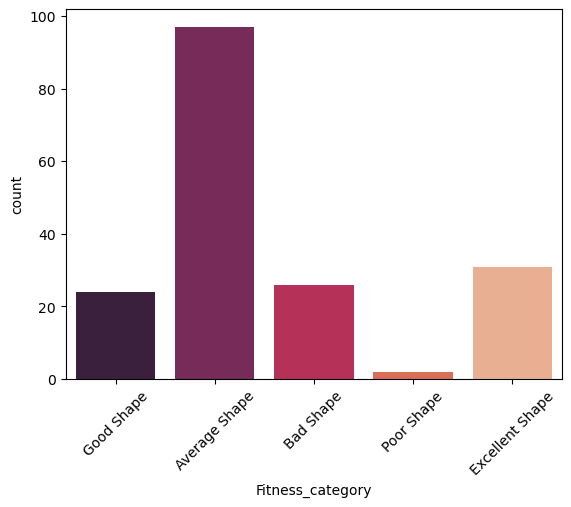

In [140]:
sns.countplot(df_cat,x = 'Fitness_category',palette = "rocket")
plt.xticks(rotation = 45)
plt.show()

### Insight - The majority of individuals in our dataset exhibit an average body shape.

### Distplot

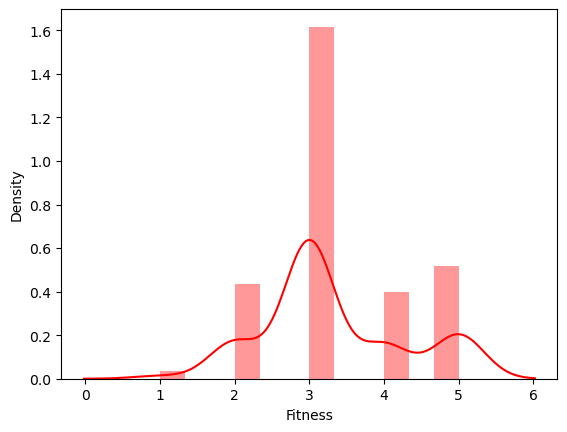

In [141]:
sns.distplot(df_cat.Fitness,color = "red")
plt.show()

### Insight - Fitness level 3 is the predominant category among individuals in our dataset.

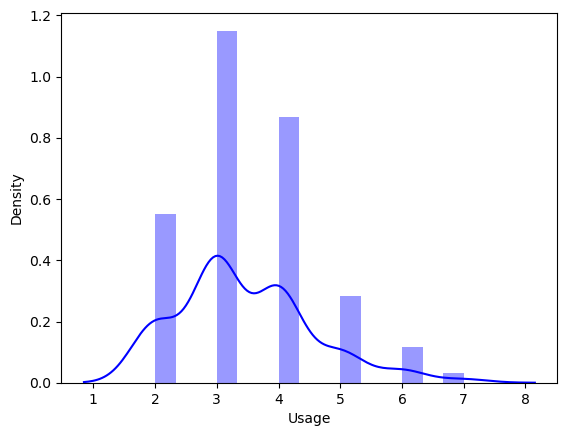

In [142]:
sns.distplot(df_cat["Usage"],color = "blue")
plt.show()

### Insight - Based on the distplot above, it can be inferred that a significant portion of individuals prefer to use the treadmill three times per week.

### Histplot

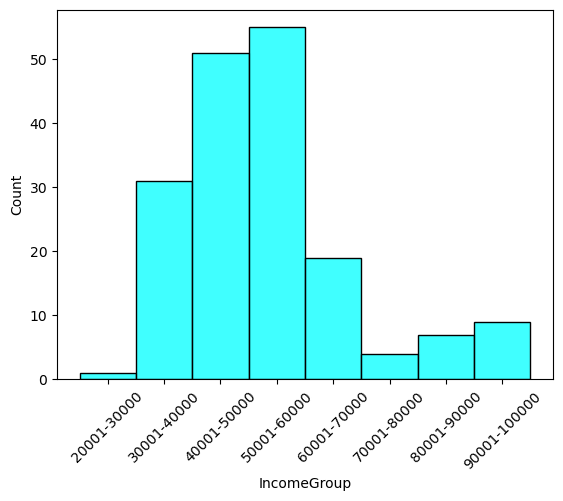

In [37]:
sns.histplot(df_cat,x = "IncomeGroup",color = "cyan")
plt.xticks(rotation = 45)
plt.show()

### Insight - In the Aerofit dataset, the majority of individuals fall within the income range of 50001-60000 dollars.

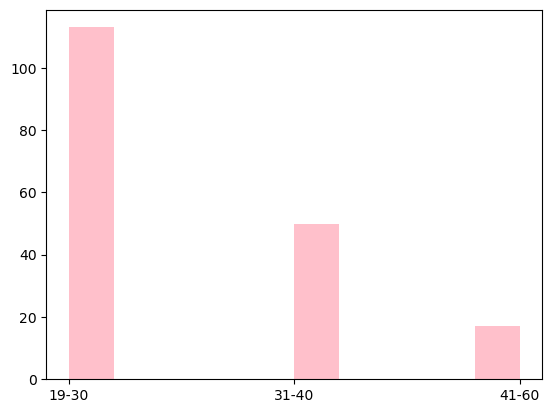

In [86]:
plt.hist(df_cat["AgeGroup"],bins = 10,color = "pink")
plt.show()

### Insight - The age group 19-30 dominates the users of the treadmill in our dataset, indicating a preference for treadmill usage among young individuals.

### Kdeplot

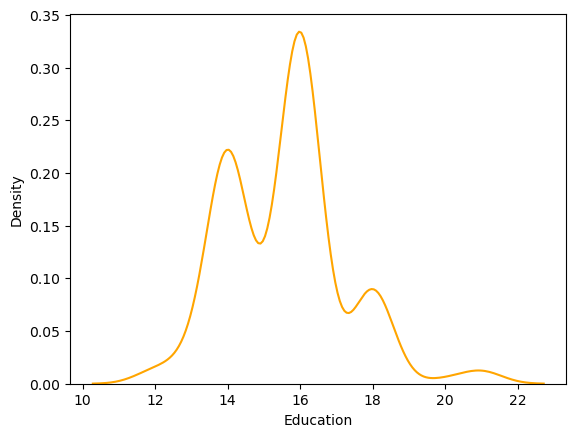

In [145]:
sns.kdeplot(df_cat["Education"],color = "orange")
plt.show()

### Insight - The majority of treadmill buyers in our dataset have completed 16 years of education.

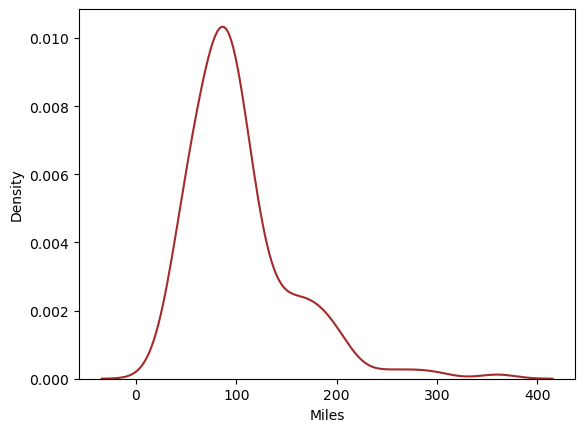

In [146]:
sns.kdeplot(df_cat['Miles'],color = "brown")
plt.show()
    

### Insight - A significant number of individuals express a preference for walking approximately 85 miles.

## categorical variables

### Boxplot

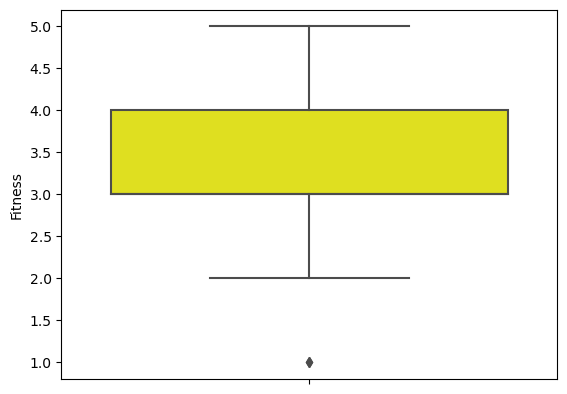

In [147]:
sns.boxplot(y = df_cat['Fitness'],color = "yellow")
plt.show()


### Insight - The boxplot analysis reveals that there are very few customers with a fitness level around 1.0, indicating that these instances are outliers in the dataset.

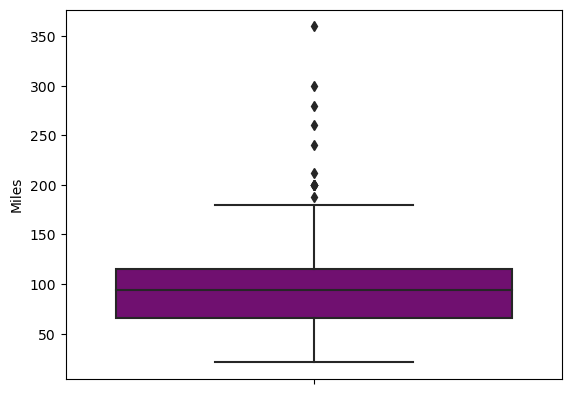

In [148]:
sns.boxplot(y = df_cat['Miles'],color = 'purple')
plt.show()

### Insight - There is a minimal number of customers in our dataset who indicate a preference for walking distances above 200 miles, as suggested by the upper whisker in the data distribution.

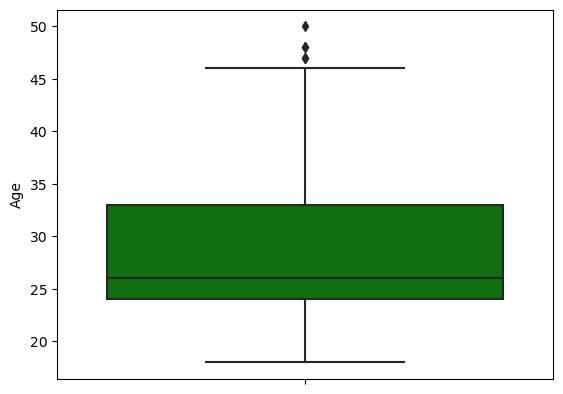

In [149]:
sns.boxplot(y = df_cat["Age"],color = "Green")
plt.show()

### Insight - Outliers are observed in the dataset for individuals above 45 years of age.

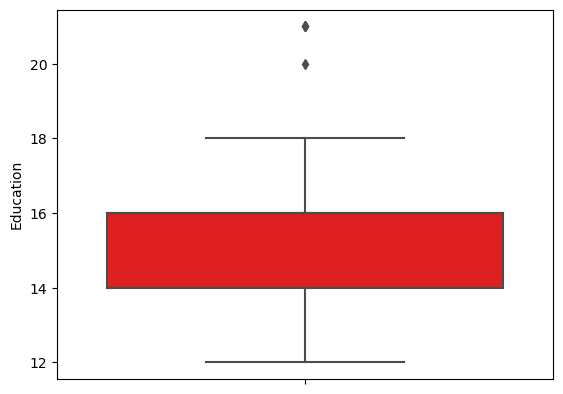

In [150]:
sns.boxplot(y = df_cat['Education'],color = "Red")
plt.show()

### Insight - A small number of individuals in the dataset have an education level exceeding 18 years.

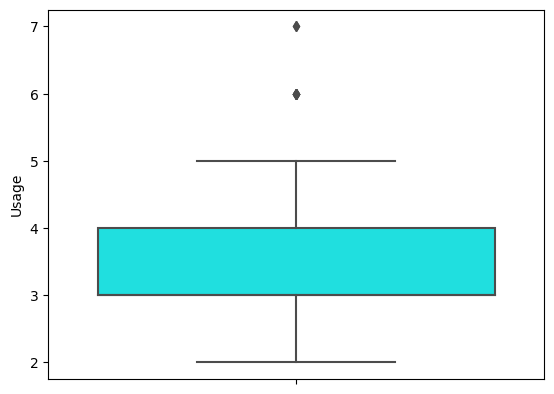

In [151]:
sns.boxplot(y = df_cat["Usage"],color = "cyan")
plt.show()

### Insight - The boxplot analysis indicates outliers in the range of 6-7 days per week, suggesting that very few individuals use the treadmill at this frequency.

## Bivariate Analysis

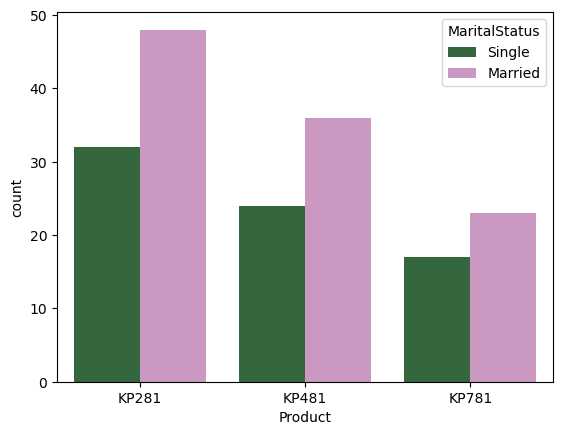

In [104]:
sns.countplot(df_cat,x = 'Product',hue = 'MaritalStatus',palette = "cubehelix")
plt.show()

### Insight - In the Aerofit dataset, a predominant trend is observed where a significant number of individuals are married, and the product KP281 emerges as their preferred choice.

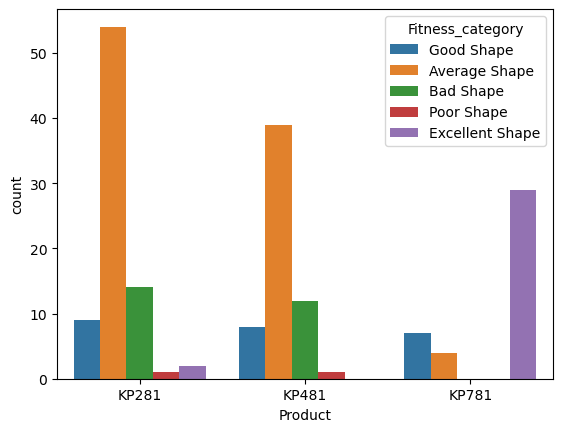

In [103]:
sns.countplot(df_cat,x = 'Product',hue = 'Fitness_category')
plt.show()

### Insight - The analysis reveals that individuals who purchase either KP281 or KP481 predominantly have an average body shape. In contrast, a substantial proportion of those buying KP781 exhibit an excellent body shape.

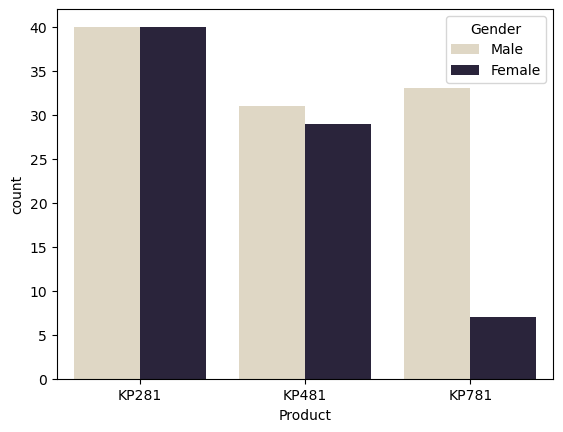

In [102]:
sns.countplot(df_cat,x = 'Product',hue = 'Gender',palette = "ch:s=-.2,r=.6")
plt.show()

### Insight - The majority of treadmill buyers of all three products are males.

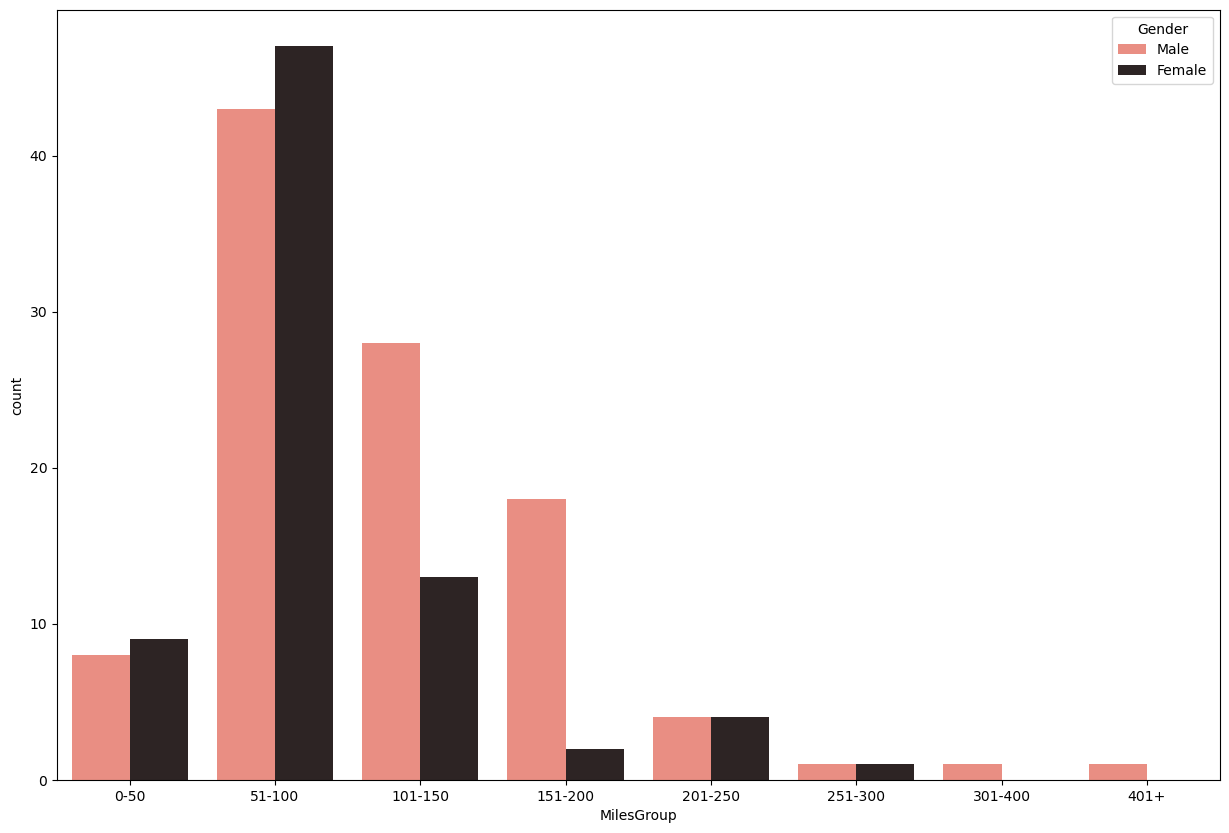

In [40]:
plt.figure(figsize = (15,10))
sns.countplot(df_cat,x = 'MilesGroup',hue = 'Gender',palette = "dark:salmon_r")
plt.show()

### Insight - Based on the preceding observation, it can be concluded that a significant number of individuals prefer to walk distances ranging from 51 to 100 miles.

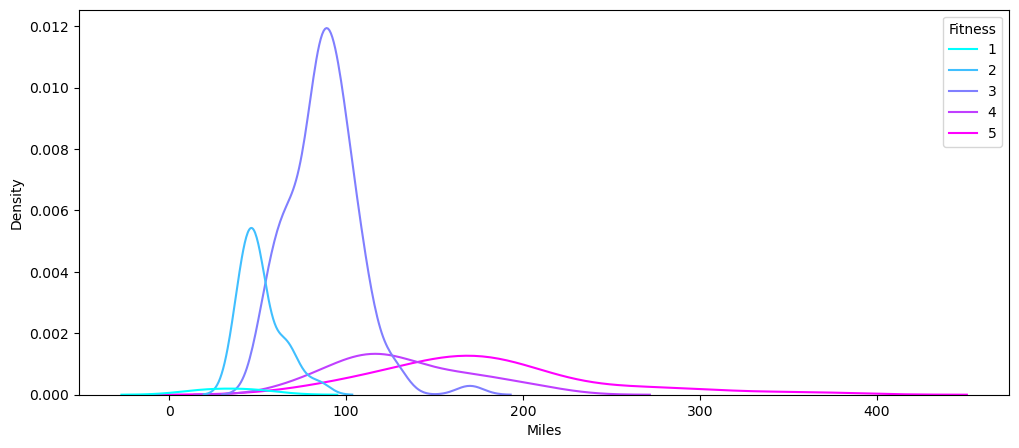

In [42]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df_cat,x='Miles',hue='Fitness',palette = "cool")
plt.show()

### Insight - The KDE plot indicates a direct relationship between miles walked and fitness level in the dataset, suggesting that as the distance covered increases, the fitness level tends to rise.

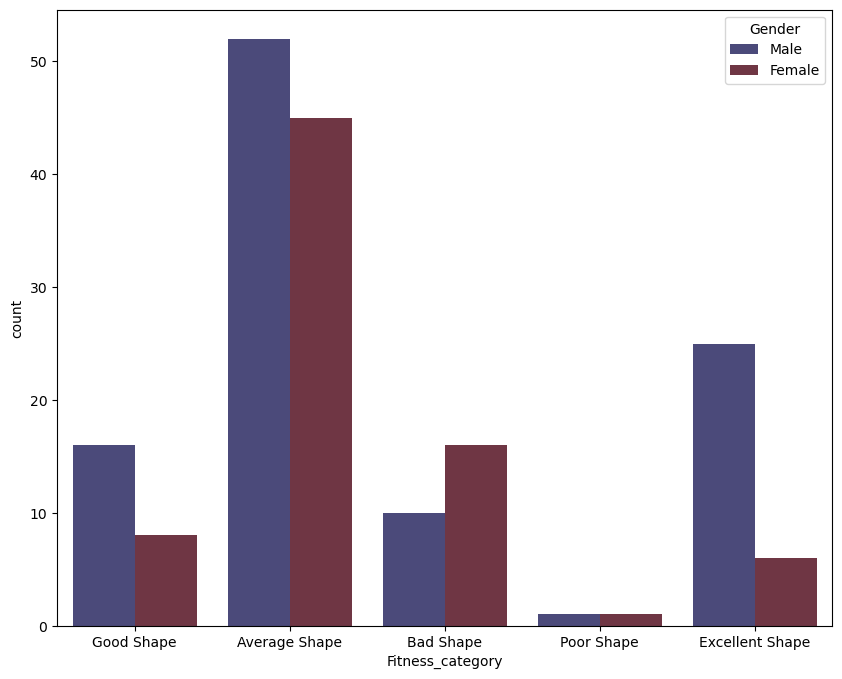

In [97]:
plt.figure(figsize = (10,8))
sns.countplot(df_cat,x = 'Fitness_category',hue = 'Gender',palette = "icefire")
plt.show()

### Insight - The majority of individuals in the dataset exhibit an average body shape. Poor shape is the least common and is observed equally in both genders, while excellent shape is more prevalent among males.

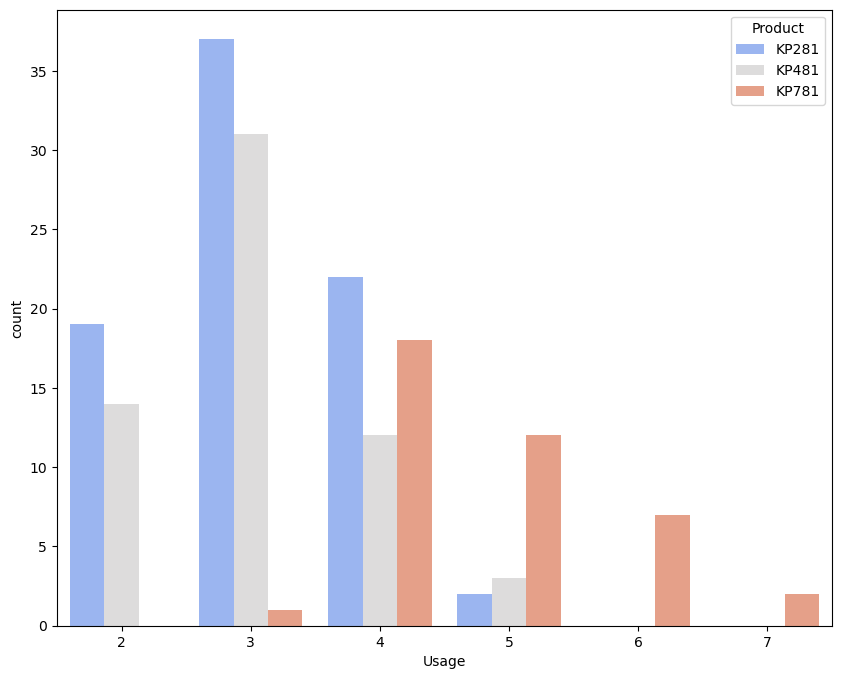

In [96]:
plt.figure(figsize = (10,8))
sns.countplot(df_cat,x = 'Usage',hue = 'Product',palette = "coolwarm")
plt.show()

### Insights - The usage pattern indicates that individuals primarily use products KP281 and KP481 three days per week, while product KP781 is most frequently used four times per week.

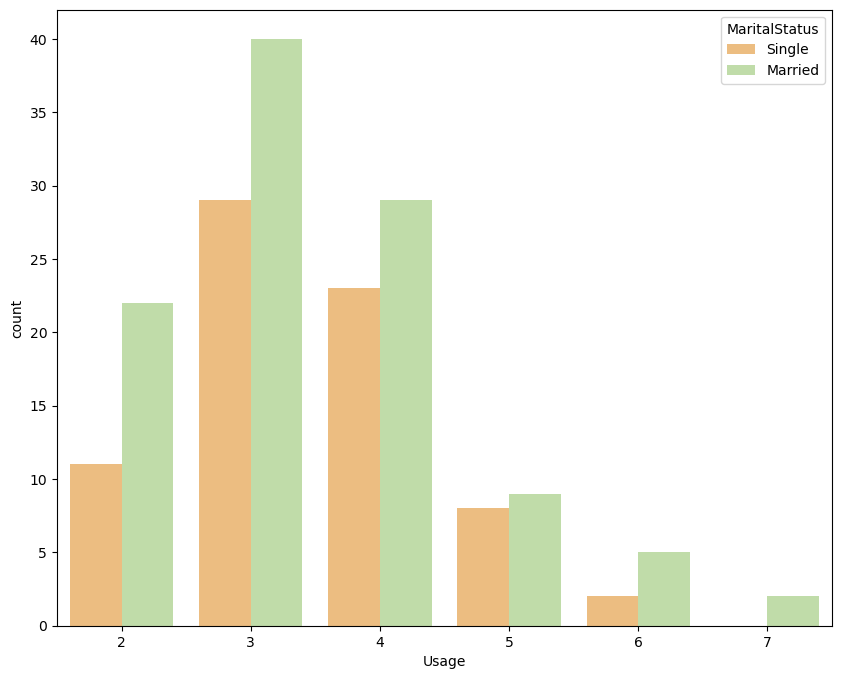

In [95]:
plt.figure(figsize = (10,8))
sns.countplot(df_cat,x = 'Usage',hue = 'MaritalStatus',palette = "Spectral")
plt.show()

### Insight - Both single and married individuals exhibit a common trend of using the treadmill predominantly three times a week.

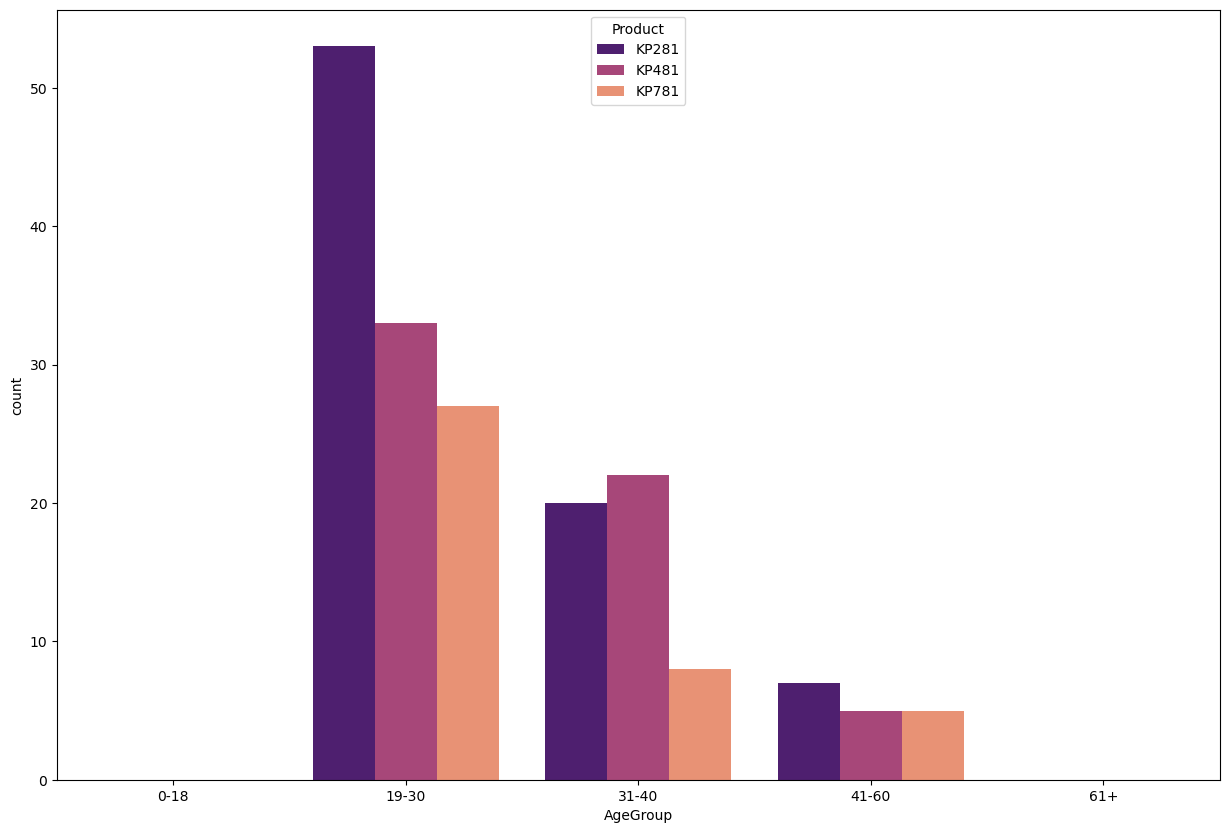

In [43]:
plt.figure(figsize = (15,10))
sns.countplot(df_cat,x = 'AgeGroup',hue = 'Product',palette = "magma")
plt.show()

### Insights - The age group 19-30 shows the highest usage across all three products in our dataset.

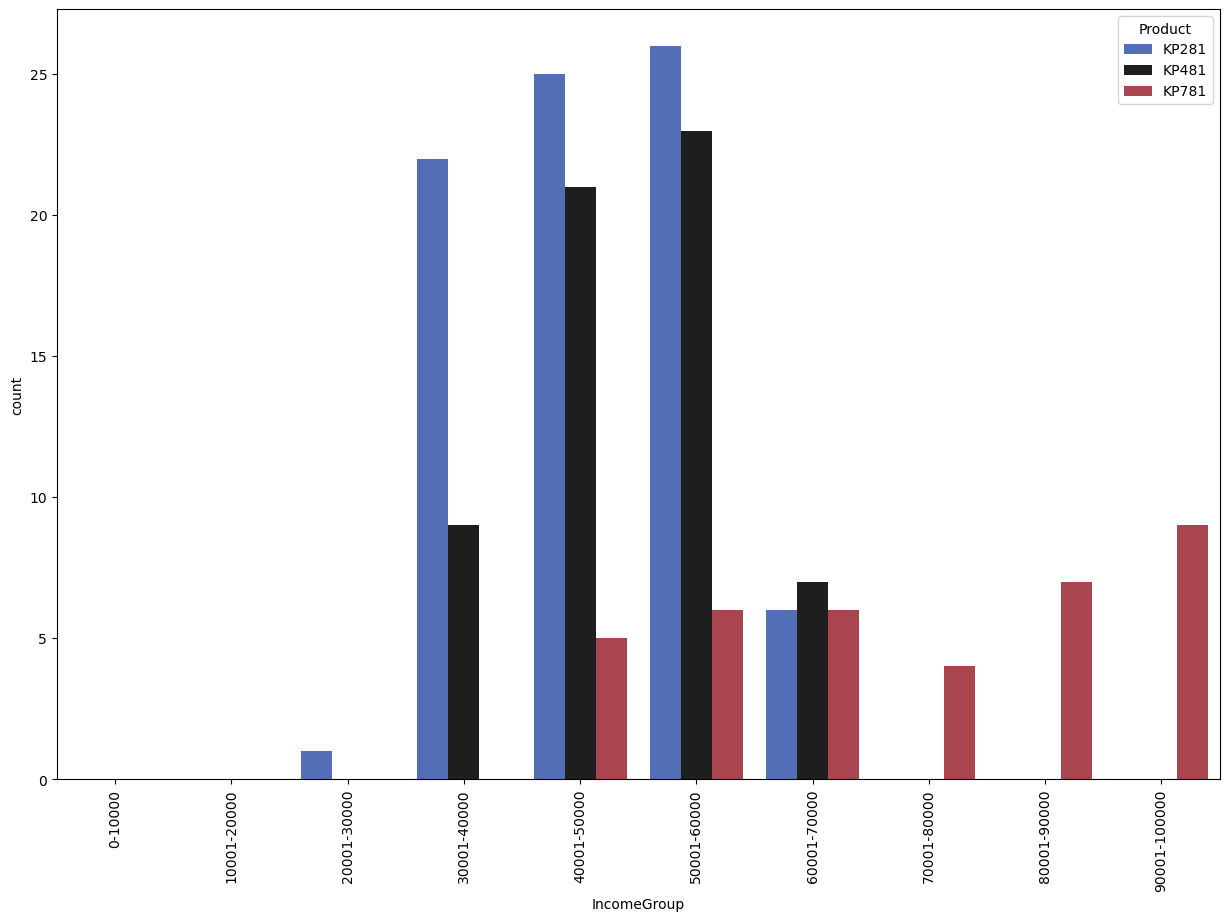

In [44]:
plt.figure(figsize = (15,10))
sns.countplot(df_cat,x = 'IncomeGroup',hue = 'Product',palette = "icefire")
plt.xticks(rotation = 90)
plt.show()

### Insights - The analysis indicates that individuals with an income between 50001-60000 dollars tend to purchase KP281 and KP481 in higher quantities. On the other hand, KP781 is more commonly bought by individuals with an income exceeding 100,000 dollars.

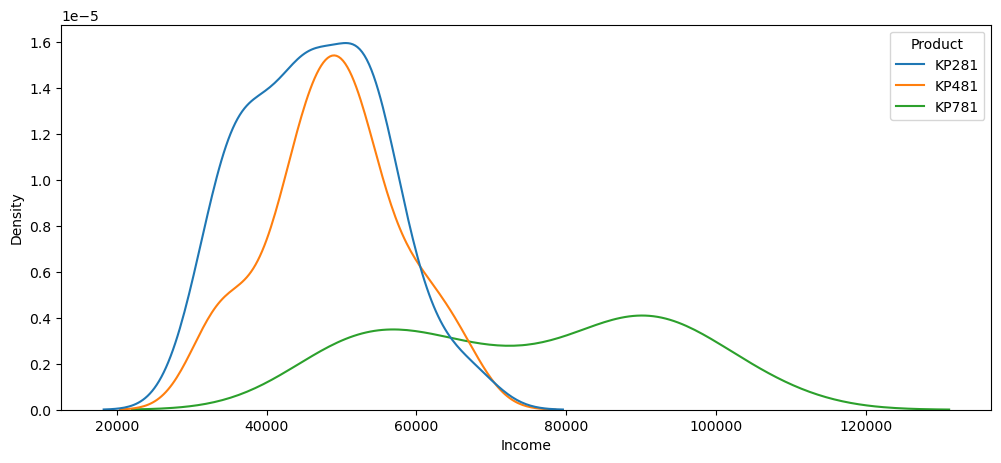

In [94]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=df_cat,x='Income',hue='Product')
plt.show()

### Insights - Individuals with higher income levels tend to opt for the KP781 product, which is priced at the maximum of $2,500. Meanwhile, those in the middle-income range are more inclined to purchase entry-level and mid-level treadmills.

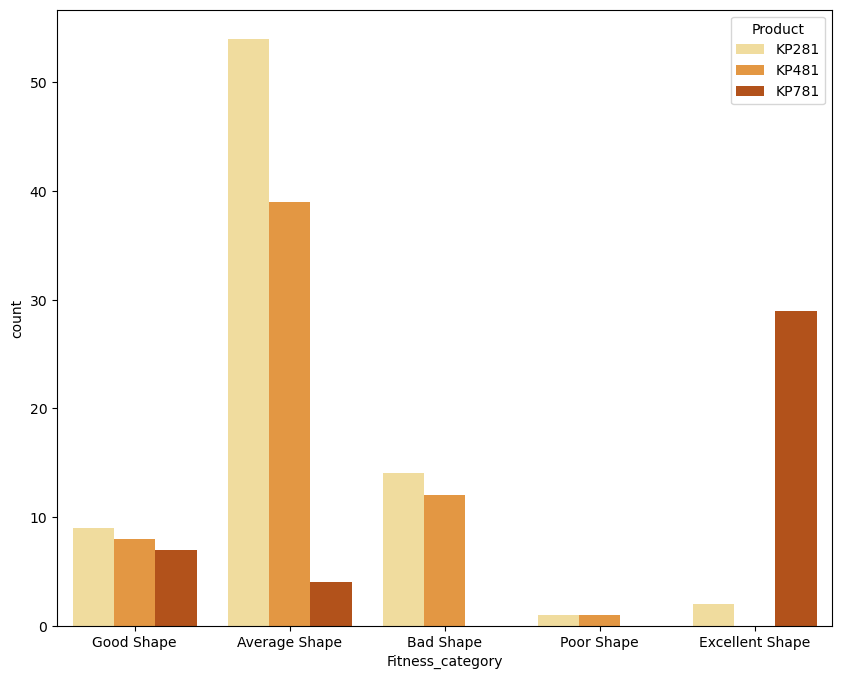

In [92]:
plt.figure(figsize = (10,8))
sns.countplot(df_cat,x = 'Fitness_category',hue = 'Product',palette = "YlOrBr")
plt.show()

### Insights - Users of the advanced-level treadmill, KP781, predominantly exhibit an excellent body shape, whereas individuals using the other two treadmills tend to have an average body shape.

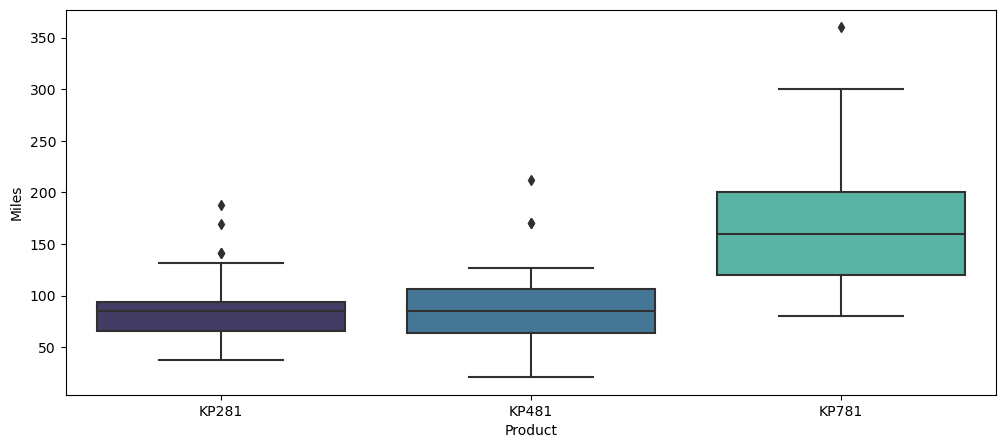

In [82]:
plt.figure(figsize=(12,5))
sns.boxplot(y='Miles',x='Product',data=df_cat,palette = "mako")
plt.show()

### Insight - In the case of products KP281 and KP481, outliers were observed above 150 miles, whereas for KP781, outliers were identified around 350 miles.

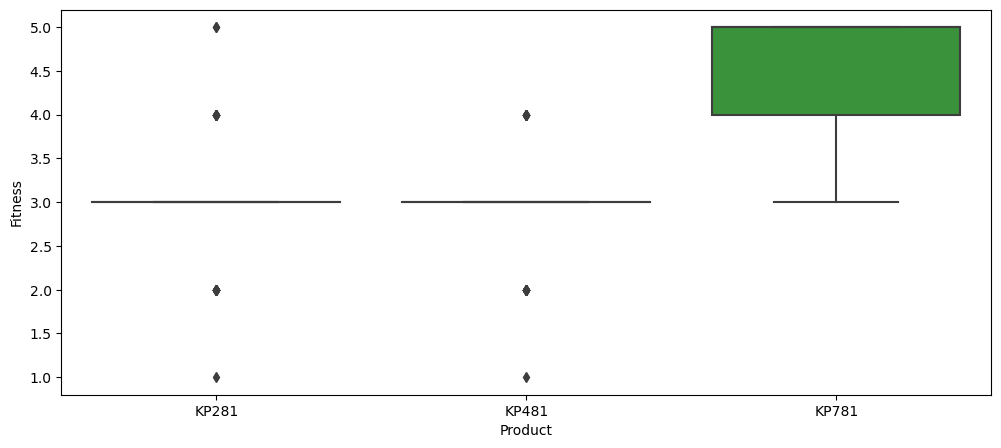

In [83]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Product',y='Fitness',data=df)
plt.show()

### Insight - Outliers were identified both above and below fitness level 3 for both KP281 and KP481. However, no outliers were detected for KP781 in relation to fitness levels.

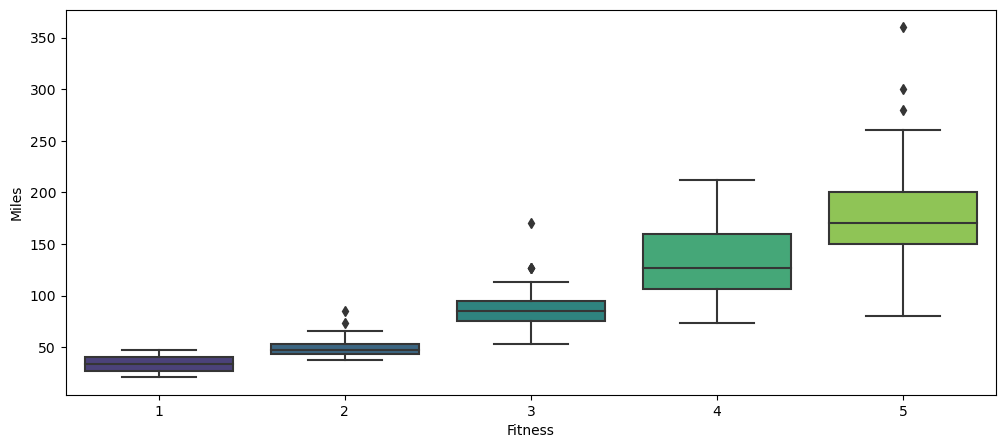

In [46]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Fitness',y='Miles',data=df_cat,palette = "viridis")
plt.show()

### Insight - In the boxplot depicting fitness versus miles, outliers were observed for fitness levels 2, 3, and 5. Conversely, no outliers were identified for fitness levels 1 and 4.

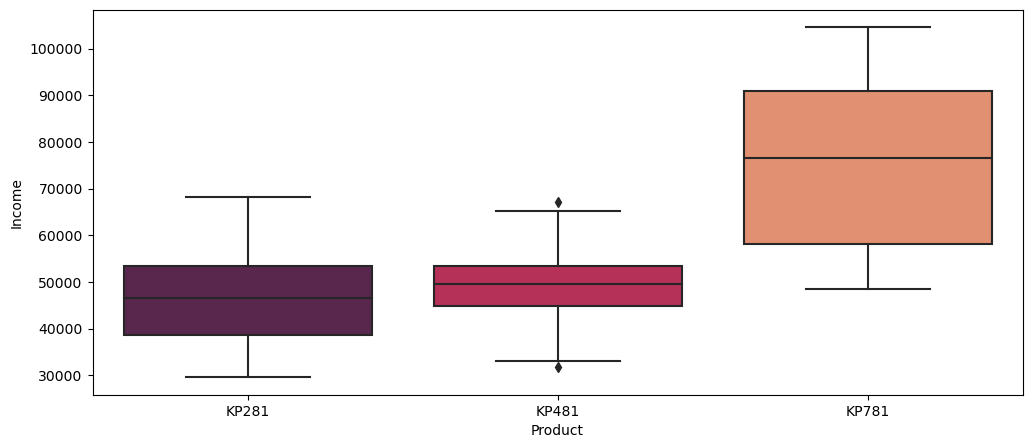

In [79]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'Product',y= 'Income',data = df_cat,palette = 'rocket')
plt.show()

### Insight - Outliers were observed around $70,000 for the product KP481, whereas no outliers were found for KP281 and KP781.

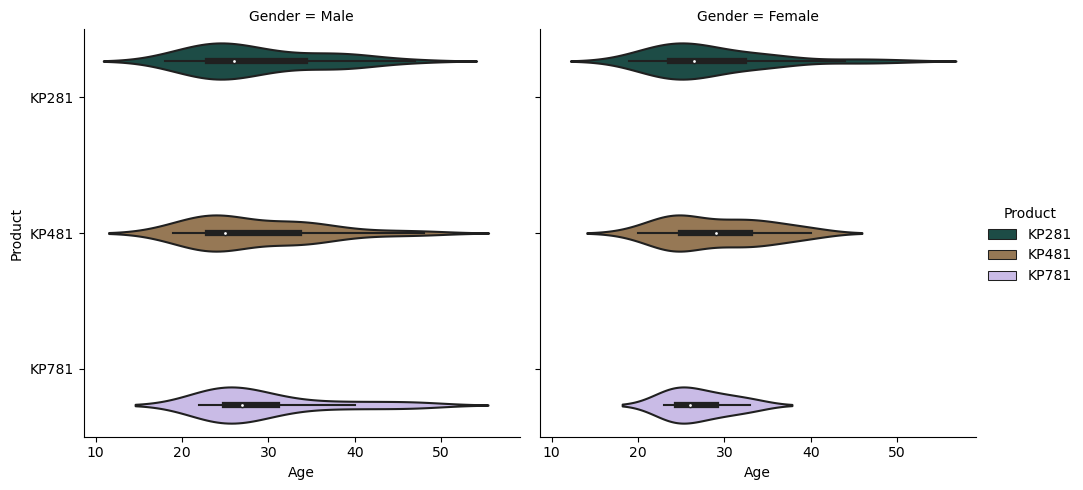

In [86]:
sns.catplot(x='Age',y='Product',hue='Product',col='Gender',data=df_cat,kind='violin',palette = "cubehelix")
plt.show()

### Insights -
- In the catplot analysis, it appears that male customers are evenly distributed among the three product types. 
- Female customers show a preference for using products KP281 and KP481 more than the advanced KP781 product. 
- Additionally, it seems that female customers tend to favor less complicated products compared to their male counterparts.

## Correlation

### Heatmap

In [35]:
df1 = df_cat[['Age','Income','Education','Usage','Fitness','Miles']]

In [36]:
df1.head()

,Age,Income,Education,Usage,Fitness,Miles
0,18,29562,14,3,4,112
1,19,31836,15,2,3,75
2,19,30699,14,4,3,66
3,19,32973,12,3,3,85
4,20,35247,13,4,2,47


In [37]:
df1.corr()

,Age,Income,Education,Usage,Fitness,Miles
Age,1.000000,0.513414,0.280496,0.015064,0.061105,0.036618
Income,0.513414,1.000000,0.625827,0.519537,0.535005,0.543473
Education,0.280496,0.625827,1.000000,0.395155,0.410581,0.307284
Usage,0.015064,0.519537,0.395155,1.000000,0.668606,0.759130
Fitness,0.061105,0.535005,0.410581,0.668606,1.000000,0.785702
Miles,0.036618,0.543473,0.307284,0.759130,0.785702,1.000000


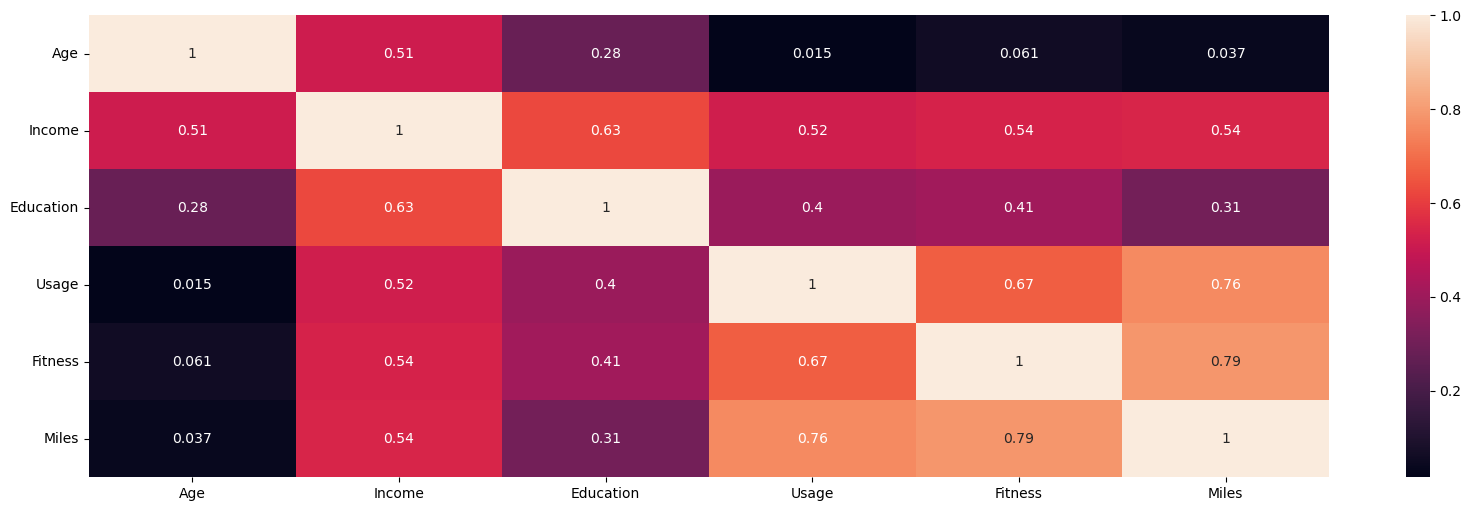

In [38]:
plt.figure(figsize=(20,6))
ax = sns.heatmap(df1.corr(),annot=True,cmap='rocket')
plt.yticks(rotation=0)
plt.show()

### Insights
- Correlation between Age and Miles is 0.03
- Correlation between Education and Income is 0.62
- Correlation between Usage and Fitness is 0.66
- Correlation between Fitness and Age is 0.06
- Correlation between Income and Usage is 0.52
- Correlation between Miles and Age is 0.03

### Pairplot

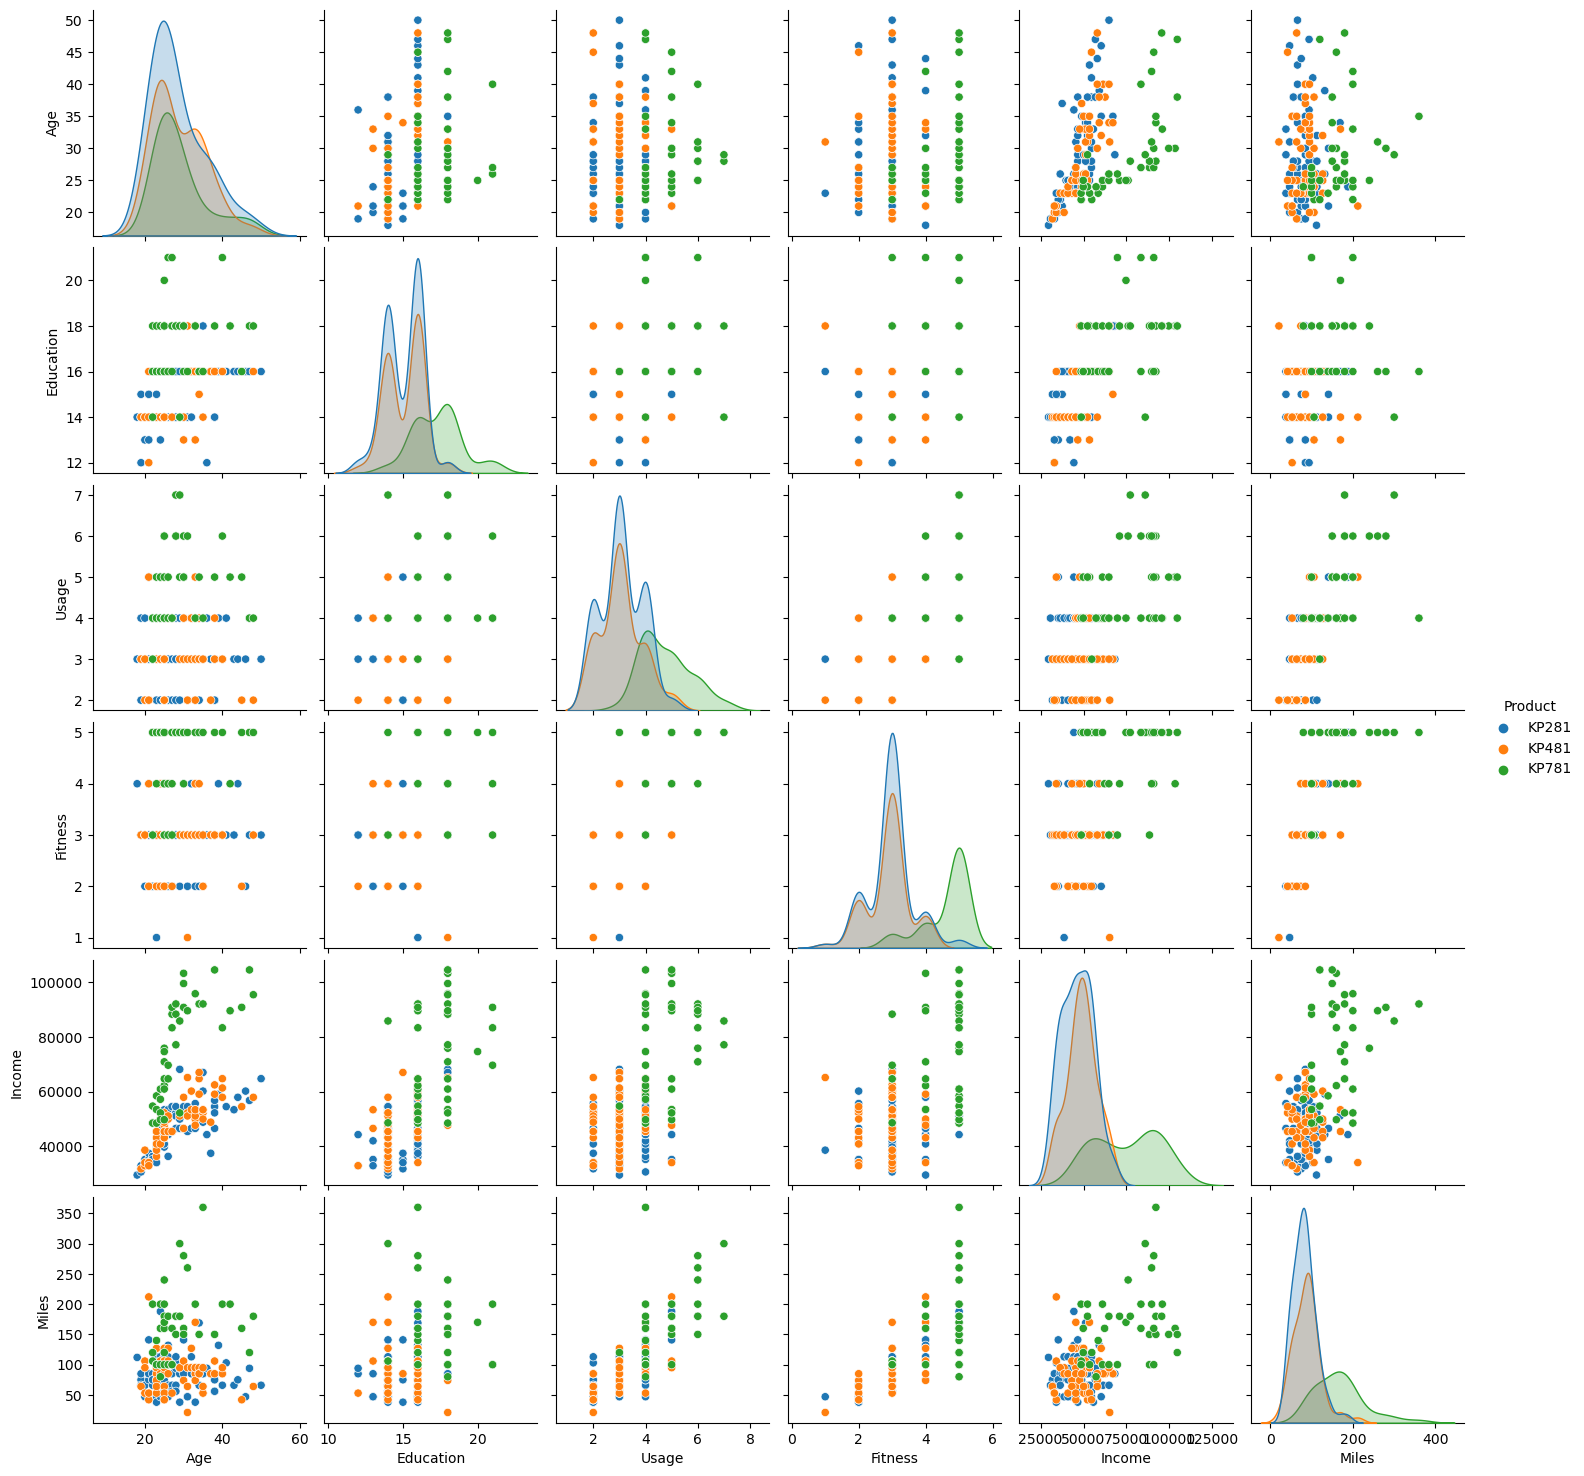

In [90]:
sns.pairplot(df_cat,hue = "Product")
plt.show()

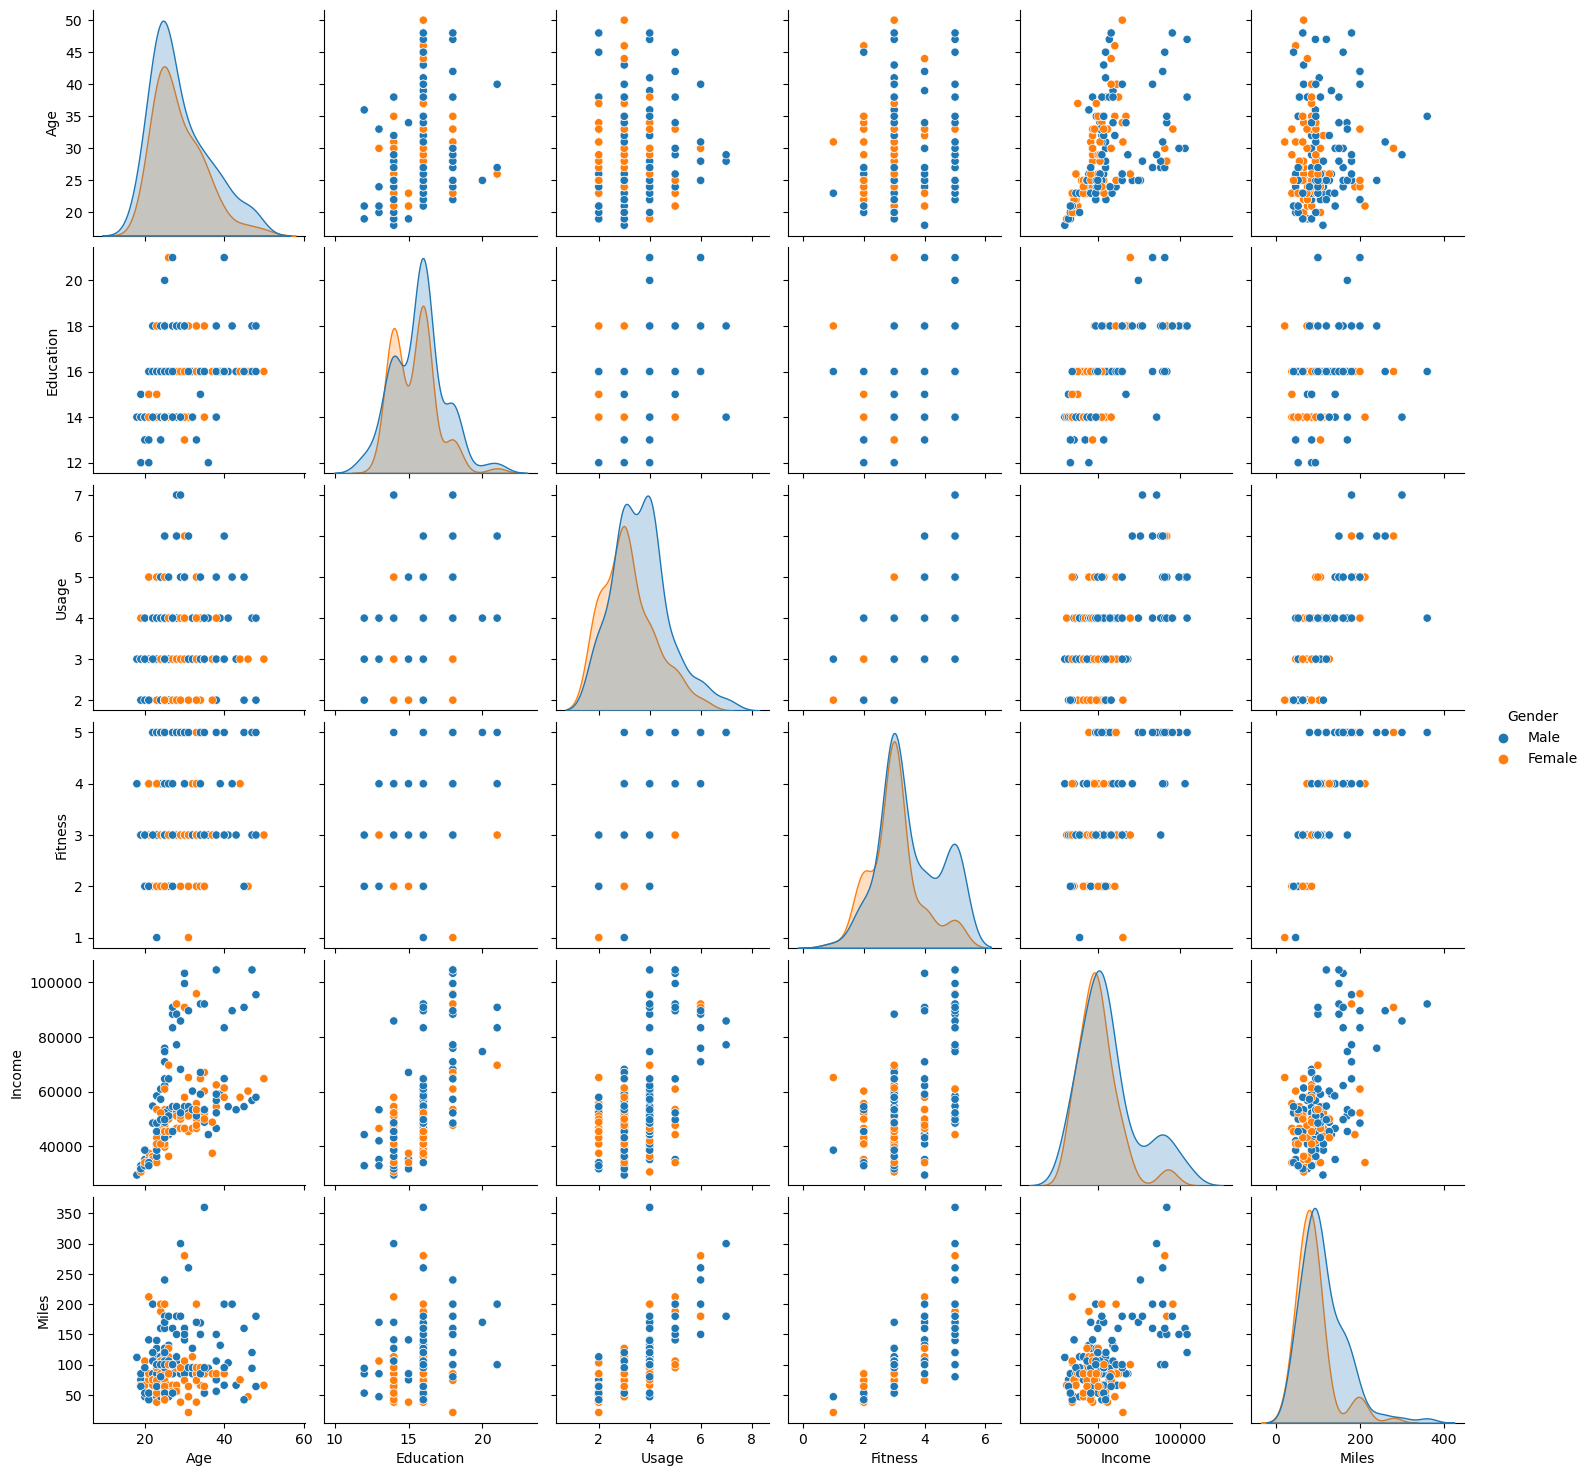

In [39]:
sns.pairplot(df_cat,hue = 'Gender')
plt.show()

# <font color = blue> **OUTLIER DETECTION**</font>

### Outlier calculation for various parameters using Inter Quartile Range

In [12]:
q_75, q_25 = np.percentile(df['Miles'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Miles is", miles_iqr)

Inter Quartile Range for Miles is 48.75


In [23]:
q_75, q_25 = np.percentile(df_cat['Age'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Age is", miles_iqr)

Inter Quartile Range for Age is 9.0


In [24]:
q_75, q_25 = np.percentile(df_cat['Income'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Income is", miles_iqr)

Inter Quartile Range for Income is 14609.25


In [25]:
q_75, q_25 = np.percentile(df_cat['Usage'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Usage is", miles_iqr)

Inter Quartile Range for Usage is 1.0


In [26]:
q_75, q_25 = np.percentile(df_cat['Fitness'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Fitness is", miles_iqr)

Inter Quartile Range for Fitness is 1.0


In [27]:
q_75, q_25 = np.percentile(df_cat['Education'], [75 ,25])
miles_iqr = q_75 - q_25
print("Inter Quartile Range for Education is", miles_iqr)

Inter Quartile Range for Education is 2.0


# <font color = blue> **PROBABILITY**</font>

## **Two-way contingency tables and probabilities(conditional and marginal)**

In [51]:
df_cat.Product.value_counts(normalize = True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

### Insight - The probability of buying KP281, KP481 & KP781 was 0.44, 0.33 & 0.22 respectively.

In [52]:
df_cat.Gender.value_counts(normalize = True)

Gender
Male      0.577778
Female    0.422222
Name: proportion, dtype: float64

### Insight - The probability of male customers was found to be 0.57 while that of female customers it was 0.42.

In [53]:
df_cat.MaritalStatus.value_counts(normalize = True)

MaritalStatus
Married    0.594444
Single     0.405556
Name: proportion, dtype: float64

### Insight - The probability of married customers was 0.59 while that of single customers it was 0.40.

In [54]:
df_cat.AgeGroup.value_counts(normalize = True)

AgeGroup
19-30    0.627778
31-40    0.277778
41-60    0.094444
0-18     0.000000
61+      0.000000
Name: proportion, dtype: float64

### Insight - If the probability of the age group 19-30 is 0.62, it suggests that there is a relatively high likelihood of individuals falling within this age range in the dataset.

In [55]:
df_cat.Fitness_category.value_counts(normalize = True)

Fitness_category
Average Shape      0.538889
Excellent Shape    0.172222
Bad Shape          0.144444
Good Shape         0.133333
Poor Shape         0.011111
Name: proportion, dtype: float64

### Insight - If the probability of having an average shape among customers is 0.53, it indicates that there is a relatively high likelihood of individuals in the dataset having an average body shape.

In [22]:
df_cat.loc[df_cat.Product=='KP281']["Gender"].value_counts(normalize = True)

Gender
Male      0.5
Female    0.5
Name: proportion, dtype: float64

### Insight - The probability of both the genders buying the product KP281 was found to be 0.5.

In [23]:
df_cat.loc[df_cat.Product=='KP481']["Gender"].value_counts(normalize = True)

Gender
Male      0.516667
Female    0.483333
Name: proportion, dtype: float64

### Insight - The probability of male customers buying the product KP481 was 0.51 while that of female customers it was 0.48.

In [26]:
df_cat.loc[df_cat.Product=='KP781']["Gender"].value_counts(normalize = True)

Gender
Male      0.825
Female    0.175
Name: proportion, dtype: float64

### Insight - The probability of male customers buying the product KP781 was 0.82, on the otherhand for female customers it was found to be 0.17.

In [27]:
df_cat.loc[df_cat.Product=='KP281']["MaritalStatus"].value_counts(normalize = True)

MaritalStatus
Married    0.6
Single     0.4
Name: proportion, dtype: float64

### Insight - The probability of married customers buying the product KP281 was 0.6 & that of single customers it was 0.4.

In [30]:
df_cat.loc[df_cat.Product=='KP481']["MaritalStatus"].value_counts(normalize = True)

MaritalStatus
Married    0.6
Single     0.4
Name: proportion, dtype: float64

### Insight - If the probability of married customers buying the product KP481 is 0.6 and the probability for single customers is 0.4, it implies that there is a higher likelihood of married customers purchasing KP481 compared to single customers.

In [31]:
df_cat.loc[df_cat.Product=='KP781']["MaritalStatus"].value_counts(normalize = True)

MaritalStatus
Married    0.575
Single     0.425
Name: proportion, dtype: float64

### Insight - If the probability of married customers buying the product KP781 is 0.57 and the probability for single customers is 0.42, it suggests that there is a higher likelihood of married customers purchasing KP781 compared to single customers.

In [19]:
pd.crosstab(df_cat.Gender, df_cat.Product)

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [73]:
round(pd.crosstab(index = [df_cat.Product], columns = df_cat.Gender,normalize = True),2)

Gender,Female,Male
Product,,
KP281,0.22,0.22
KP481,0.16,0.17
KP781,0.04,0.18


In [22]:
pd.crosstab(df_cat.MaritalStatus,df_cat.Product)

Product,KP281,KP481,KP781
MaritalStatus,,,
Married,48,36,23
Single,32,24,17


In [72]:
round(pd.crosstab(index=[df_cat.Product,df_cat.MaritalStatus],columns=df_cat.Gender,normalize=True),2)


Gender                 Female  Male
Product MaritalStatus              
KP281   Married          0.15  0.12
        Single           0.07  0.11
KP481   Married          0.08  0.12
        Single           0.08  0.06
KP781   Married          0.02  0.11
        Single           0.02  0.08

In [71]:
pd.crosstab(df_cat.Usage,df_cat.Product)

Product,KP281,KP481,KP781
Usage,,,
2,19,14,0
3,37,31,1
4,22,12,18
5,2,3,12
6,0,0,7
7,0,0,2


In [74]:
round(pd.crosstab(index=[df_cat.Product],columns=df_cat.Usage,normalize=True),2)

Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00
KP481,0.08,0.17,0.07,0.02,0.00,0.00
KP781,0.00,0.01,0.10,0.07,0.04,0.01


In [27]:
pd.crosstab(df_cat.Fitness,df_cat.Product)

Product,KP281,KP481,KP781
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


In [75]:
round(pd.crosstab(index=[df_cat.Product],columns=df_cat.Fitness,normalize=True),2)

Fitness,1,2,3,4,5
Product,,,,,
KP281,0.01,0.08,0.30,0.05,0.01
KP481,0.01,0.07,0.22,0.04,0.00
KP781,0.00,0.00,0.02,0.04,0.16


In [28]:
pd.crosstab(df_cat.Fitness_category,df_cat.Product)

Product,KP281,KP481,KP781
Fitness_category,,,
Average Shape,54,39,4
Bad Shape,14,12,0
Excellent Shape,2,0,29
Good Shape,9,8,7
Poor Shape,1,1,0


In [13]:
round(pd.crosstab(index=[df_cat.Product,df_cat.Fitness_category],columns=df_cat.Gender,normalize=True)*100,2)


Gender                    Female   Male
Product Fitness_category               
KP281   Average Shape      14.44  15.56
        Bad Shape           5.56   2.22
        Excellent Shape     0.56   0.56
        Good Shape          1.67   3.33
        Poor Shape          0.00   0.56
KP481   Average Shape      10.00  11.67
        Bad Shape           3.33   3.33
        Good Shape          2.22   2.22
        Poor Shape          0.56   0.00
KP781   Average Shape       0.56   1.67
        Excellent Shape     2.78  13.33
        Good Shape          0.56   3.33

In [14]:
pd.crosstab(df_cat.AgeGroup,df_cat.Product)

Product,KP281,KP481,KP781
AgeGroup,,,
19-30,53,33,27
31-40,20,22,8
41-60,7,5,5


In [68]:
np.round(pd.crosstab(index=df_cat.Product,columns=df_cat.AgeGroup,normalize='columns',margins=True)*100,2)

AgeGroup,19-30,31-40,41-60,All
Product,,,,
KP281,46.90,40.0,41.18,44.44
KP481,29.20,44.0,29.41,33.33
KP781,23.89,16.0,29.41,22.22


In [47]:
pd.crosstab(df_cat.EducationYearsGroup,df_cat.Product)

Product,KP281,KP481,KP781
EducationYearsGroup,,,
13-16,39,27,2
17-18,39,31,15
19-20,2,2,19
21+,0,0,4


In [77]:
round(pd.crosstab(index=[df_cat.Product],columns=df_cat.EducationYearsGroup,normalize=True),2)

EducationYearsGroup,13-16,17-18,19-20,21+
Product,,,,
KP281,0.22,0.22,0.01,0.00
KP481,0.15,0.17,0.01,0.00
KP781,0.01,0.08,0.11,0.02


In [48]:
pd.crosstab(df_cat.MilesGroup,df_cat.Product)

Product,KP281,KP481,KP781
MilesGroup,,,
0-50,12,5,0
51-100,50,39,1
101-150,16,13,12
151-200,2,2,16
201-250,0,1,7
251-300,0,0,2
301-400,0,0,1
401+,0,0,1


In [78]:
round(pd.crosstab(index=[df_cat.Product],columns=df_cat.MilesGroup,normalize=True),2)

MilesGroup,0-50,51-100,101-150,151-200,201-250,251-300,301-400,401+
Product,,,,,,,,
KP281,0.07,0.28,0.09,0.01,0.00,0.00,0.00,0.00
KP481,0.03,0.22,0.07,0.01,0.01,0.00,0.00,0.00
KP781,0.00,0.01,0.07,0.09,0.04,0.01,0.01,0.01


In [49]:
pd.crosstab(df_cat.IncomeGroup,df_cat.Product)

Product,KP281,KP481,KP781
IncomeGroup,,,
20001-30000,1,0,0
30001-40000,22,9,0
40001-50000,25,21,5
50001-60000,26,23,6
60001-70000,6,7,6
70001-80000,0,0,4
80001-90000,0,0,7
90001-100000,0,0,9


In [79]:
round(pd.crosstab(index=[df_cat.Product],columns=df_cat.IncomeGroup,normalize=True),2)

IncomeGroup,20001-30000,30001-40000,40001-50000,50001-60000,60001-70000,70001-80000,80001-90000,90001-100000
Product,,,,,,,,
KP281,0.01,0.12,0.14,0.15,0.03,0.00,0.00,0.00
KP481,0.00,0.05,0.12,0.13,0.04,0.00,0.00,0.00
KP781,0.00,0.00,0.03,0.03,0.03,0.02,0.04,0.05


In [14]:
round(pd.crosstab(index=[df_cat.Product,df_cat.MaritalStatus],columns=df_cat.Gender,normalize=True),2)


Gender                 Female  Male
Product MaritalStatus              
KP281   Married          0.15  0.12
        Single           0.07  0.11
KP481   Married          0.08  0.12
        Single           0.08  0.06
KP781   Married          0.02  0.11
        Single           0.02  0.08

In [34]:
def p_prod_given_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



In [36]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Married":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Married'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Married')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Married): 0.21
P(KP481/Married): 0.34
P(KP281/Married): 0.45



# <font color = blue> **CUSTOMER PROFILING**</font>

### **KP281**

- The KP281 is an entry-level product with a price tag of 1,500 dollars, making it the most preferred choice among customers.

- Married individuals show a higher preference for KP281 compared to single customers.
- The majority of individuals using KP281 have an average body shape.
- The probability of both genders using KP281 is equal, standing at 0.22.
- The maximum usage frequency for KP281 is observed at 3 days per week.
- The age group 19-30 demonstrates a higher usage of this product.
- Customers with an income range between 50,001 and 60,000 dollars are the predominant buyers of KP281.
- Most customers of KP281 engage in walking distances between 50-100 miles.
- Fitness level 3 is the most common among users of KP281.
- Income range between 39K to 53K have preferred this product.
    

### **KP481**

- This intermediate-level product, priced at 1750 dollars has a higher prevalence among male customers.

- On average, users engage with this product three days per week.
- Notably, outliers were identified in the income range of 60,000 dollars to 70,000 dollars for the KP481, indicating that individuals earning less than 70,000 dollars also purchased this product.
- This treadmill is particularly popular among teenagers and middle-aged individuals.
- A significant portion of married customers also shows a preference for this product.
- Fitness level 3 is more common among people using this product.
- The fitness levels associated with this product span from bad shape to average shape, with no instances of customers in excellent shape using it.
- Users of this product typically walk distances ranging from 50 to 100 miles per week.

### **KP781**

- KP781 stands out as a top-tier product with advanced features, making it the most exoensive among the three treadmills.

- Owing to its high price and advanced nature, there is a lower customer preference for this  product.

- Its popularity is notably higher among married males.

- The probability of male customers buying the product KP781 is 33%, on the otherhand for female customers it is 7%.
- Similar to the other two products, it is commonly favored by young individals.
- Users typically engage with the KP781 4-5 times per week.
- Those who incorporate this treadmill into their routine tend to maintain excellent physical fitness.
- Users of this advanced treadmill often cover distances ranging from 100-200 miles per week, with some enthusiasts surpassing the 350 mile mark.

- Individuals using KP781 generally exhibit fitness levels in the range of 4-5.

# <font color = blue>**BUSINESS INSIGHTS BASED ON NON-GRAPHICAL AND VISUAL ANALYSIS**</font>

###
1. Among the three treadmills in the Aerofit dataset, KP281 emerged as the preferred choice for users.

2. Treadmill usage is more prevalent among males, suggesting a greater fitness concern among males compared to females.

3. Married individuals were observed to use the treadmill more frequently than their single counterparts.

4. Users of either KP281 or KP481 tended to have a body shape ranging from bad to average, whereas those using KP781 exhibited an excellent body shape.

5. Excellent body shape was more commonly observed in males than in females.

6. The treadmill is most favored by young people (teen to young adult age group).

7. The average usage frequency for KP281 and KP481 was found to be three times per week, while for KP781, it was four days per week.

8. Individuals with 17-18 years of education were observed to prefer KP281 or KP481, while those with 19-20 years of education opted for KP781, the more advanced featured product.

9. People with higher income levels showed a greater preference for purchasing the KP781 product.

10. Users of KP281 and KP48 typically run 500-100 miles per week, whereas those on KP781 tend to cover 100-200 miles per week, with some individuals running up to 350 miles.

# <font color = blue>**RECOMMENDATIONS**</font>

### 

- Given that KP281 emerged as the preferred choice among the three treadmills, it might be beneficial to highlight its features and benefits in marketing and sales efforts.

- Focus marketing efforts toward males, as treadmill usage is more prevalent among them. Consider tailoring promotions or features that specifically appeal to male fitness concerns.

- Since married individuals were observed to use the treadmill more frequently, consider marketing strategies that appeal to couples or highlight the benefits of shared fitness activities for married individuals.

- Highlight the association between excellent body shape and the use of KP781. This could be a key selling point for individuals seeking specific fitness outcomes.

- Target marketing efforts towards young people (teen to young adult age group) who favor treadmill usage the most. This could involve creating engaging and youth-oriented promotional content.

- Emphasize the convenience and effectiveness of KP781 by promoting its four-day per week usage frequency, potentially appealing to users looking for a more intensive workout routine.

- Tailor marketing messages to individuals with 17-18 years of education for KP281 or KP481, highlighting features that align with their preferences. For those with 19-20 years of education, focus on promoting the advanced features of KP781.

- Given that people with higher income levels prefer KP781, target advertising to higher-income brackets. Emphasize the premium features and benefits associated with KP781 to justify the higher price point.

- Consider marketing messages that align with the running preferences of each treadmill. Highlight the durability and performance features of KP281 and KP481 for users who run 500-100 miles per week. For KP781, emphasize its suitability for those covering 100-200 miles per week, with the capability to accommodate longer distances up to 350 miles.
